# Задание 1

Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на
точность классификации в датасетах про крестики-нолики (tic_tac_toe.txt) и о спаме e-mail сообщений (spam.csv) с помощью наивного Байесовского классификатора. 

Постройте графики зависимостей точности на обучающей и тестовой выборках в зависимости от их соотношения.

### Крестики-нолики

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_precision_recall_curve

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [20]:
data_tic_tac = pd.read_csv('lab1_files/tic_tac_toe.csv')
data_tic_tac.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'result']
data_tic_tac

,x1,x2,x3,x4,x5,x6,x7,x8,x9,result
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [21]:
encoded_data = data_tic_tac.apply(LabelEncoder().fit_transform)

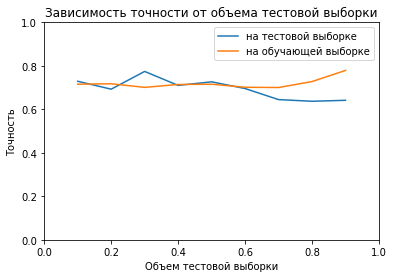

In [41]:
test_size = [i / 10 for i in range(1, 10)]
accuracy = []
accuracy_train = []

for size in test_size:
    x_train, x_test, y_train, y_test = train_test_split(
        encoded_data.drop(['result'], axis=1), 
        encoded_data['result'], 
        test_size=size)
 
    model = GaussianNB()
    model.fit(x_train, y_train)

    # на тестовой
    predicted = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, predicted))
    
    # на обучающей
    predicted = model.predict(x_train)
    accuracy_train.append(accuracy_score(y_train, predicted))
    
    

plt.title("Зависимость точности от объема тестовой выборки")
axes = plt.gca()
axes.set_ylabel('Точность')
axes.set_xlabel('Объем тестовой выборки')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
plt.plot(test_size, accuracy, label='на тестовой выборке')
plt.plot(test_size, accuracy_train, label='на обучающей выборке')
plt.legend()
plt.show()

### Спам e-mail сообщений

In [28]:
data_email = pd.read_csv('lab1_files/spam.csv')
data_email.type = data_email.type.map({'spam': 1, 'nonspam': 0})
data_email.drop(data_email.columns[[0]], axis=1, inplace=True)
data_email

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


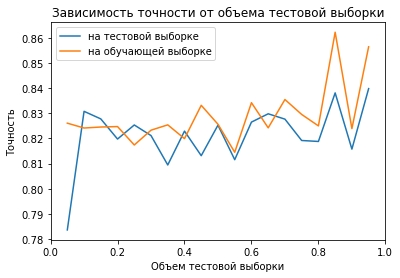

In [42]:
test_size = [i / 20 for i in range(1, 20)]

accuracy = []
accuracy_train = []

for size in test_size:
    x_train, x_test, y_train, y_test = train_test_split(
        data_email.drop(['type'], axis=1), 
        data_email['type'], 
        test_size=size)
 
    model = GaussianNB()
    model.fit(x_train, y_train)
    
    # на тестовой
    predicted = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, predicted))
    
    # на обучающей
    predicted = model.predict(x_train)
    accuracy_train.append(accuracy_score(y_train, predicted))

plt.title("Зависимость точности от объема тестовой выборки")
axes = plt.gca()
axes.set_ylabel('Точность')
axes.set_xlabel('Объем тестовой выборки')
axes.set_xlim([0.0, 1.0])

plt.plot(test_size, accuracy, label='на тестовой выборке')
plt.plot(test_size, accuracy_train, label='на обучающей выборке')
plt.legend()
plt.show()

# Задание 2

Сгенерируйте 100 точек с двумя признаками X1 и X2 в соответствии с нормальным распределением так, что одна и вторая часть точек (класс -1 и класс 1) имеют параметры: мат. ожидание X1, мат. ожидание X2, среднеквадратические отклонения для обеих переменных, соответствующие вашему варианту (указан в таблице). 

Построить диаграммы, иллюстрирующие данные. Построить Байесовский классификатор и оценить качество классификации с помощью различных методов (точность, матрица ошибок, ROС и PR-кривые). 

Является ли построенный классификатор «хорошим»?

In [259]:
# класс -1
x1_1 = np.random.normal(15, math.sqrt(3), 60) 
x2_1 = np.random.normal(9, math.sqrt(3), 60) 

# класс 1
x1_2 = np.random.normal(15, math.sqrt(5), 40)
x2_2 = np.random.normal(8, math.sqrt(5), 40)

d = {
    'x1': np.concatenate((x1_1, x1_2)),
    'x2': np.concatenate((x2_1, x2_2)),
    'class': [-1] * 50 + [1] * 50}

data = pd.DataFrame(d)
data

,x1,x2,class
0,17.484975,8.507629,-1
1,16.170192,8.521479,-1
2,16.532035,6.813593,-1
3,17.126705,6.782941,-1
4,15.989224,7.406226,-1
...,...,...,...
95,14.479744,8.688405,1
96,15.257845,9.364555,1
97,13.525996,4.860739,1
98,13.355478,7.413699,1


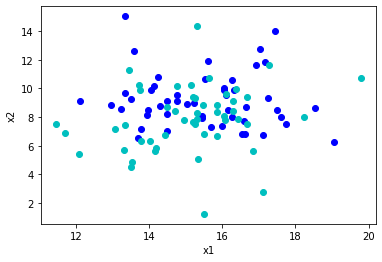

In [260]:
fig, axes = plt.subplots()
axes.scatter(data[data['class'] == -1]['x1'],
          data[data['class'] == -1]['x2'],
          c='b')
axes.scatter(data[data['class'] == 1]['x1'],
          data[data['class'] == 1]['x2'],
          c='c')
axes.set_ylabel('x2')
axes.set_xlabel('x1')
plt.show()

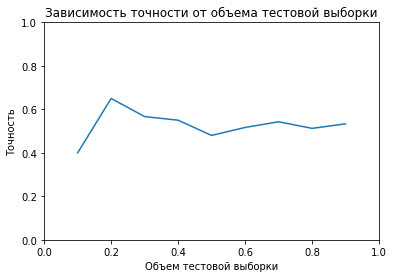

In [316]:
test_size = [i / 10 for i in range(1, 10)]
accuracy = []


for size in test_size:
    x_train, x_test, y_train, y_test = train_test_split(
        data.drop(['class'], axis=1), 
        data['class'], 
        test_size=size)
 
    model = GaussianNB()
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, predicted))

plt.title("Зависимость точности от объема тестовой выборки")
axes = plt.gca()
axes.set_ylabel('Точность')
axes.set_xlabel('Объем тестовой выборки')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
plt.plot(test_size, accuracy)
plt.show()

Точность:  0.62
Матрица ошибок: 
[[18  4]
 [15 13]]


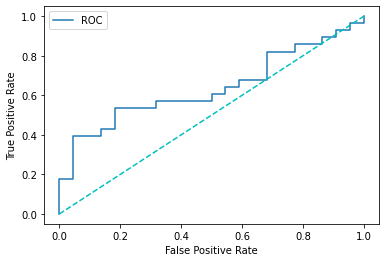

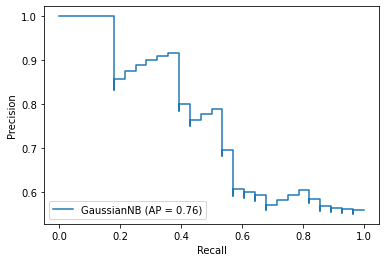

In [347]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), 
    data['class'], 
    test_size=0.5)

model = GaussianNB()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print('Точность: ', accuracy_score(y_test, predicted))
print('Матрица ошибок: ')
print(confusion_matrix(y_test, predicted))

probs = model.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='c', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

display = plot_precision_recall_curve(model, x_test, y_test)

# Задание 3

Постройте классификатор на основе метода k ближайших соседей для обучающего множества Glass (glass.csv). Посмотрите заголовки признаков и классов. Перед
построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки.
1. Постройте графики зависимости ошибки классификации от количества ближайших соседей.
2. Определите подходящие метрики расстояния и исследуйте, как тип метрики расстояния влияет на точность классификации.
3. Определите, к какому типу стекла относится экземпляр с характеристиками: 
   RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [4]:
data_glass = pd.read_csv('lab1_files/glass.csv')
data_glass.drop('Id', axis=1, inplace=True)
data_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


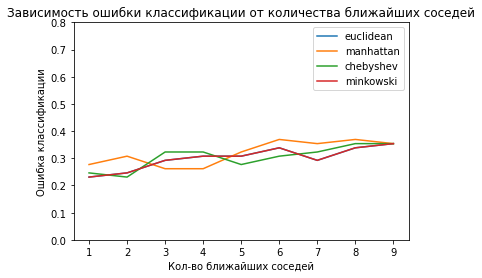

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    data_glass.drop(['Type'], axis=1), 
    data_glass['Type'], 
    test_size=0.3)

metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

for metric in metrics:
    accuracy = []
    for n in range(1, 10):
        model = KNeighborsClassifier(n_neighbors=n, metric=metric)
        
        # cv_score = cross_val_score(model, x_train, y_train, cv=5)
        # accuracy.append(1 - np.mean(cv_score))
        model.fit(x_train, y_train)
        predicted = model.predict(x_test)
        accuracy.append(1 - accuracy_score(y_test, predicted))
        
    plt.plot(range(1, 10), accuracy, label=metric)
    
plt.title("Зависимость ошибки классификации от количества ближайших соседей")
axes = plt.gca()
axes.set_ylabel('Ошибка классификации')
axes.set_xlabel('Кол-во ближайших соседей')
axes.set_ylim([0.0, 0.8])
axes.legend()
plt.show()

In [67]:
x = [[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]]

model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(x_train, y_train) 

result_predict = model.predict(x)
print('Тип стекла:', result_predict[0])

Тип стекла: 5


# Задание 4

Постройте классификаторы на основе метода опорных векторов для наборов данных из файлов svmdataN.txt и svmdataNtest.txt, где N – индекс задания:
1. Постройте алгоритм метода опорных векторов с линейным ядром. Визуализируйте разбиение пространства признаков на области с помощью полученной модели (пример визуализации). Выведите количество полученных опорных векторов, а также матрицу ошибок классификации на обучающей и тестовой выборках.
2. Постройте алгоритм метода опорных векторов с линейным ядром. Добейтесь нулевой ошибки сначала на обучающей выборке, а затем на тестовой, путем изменения штрафного параметра. Выберите оптимальное значение данного параметра и объясните свой выбор. Всегда ли нужно добиваться минимизации ошибки на обучающей выборке?
3. Постройте алгоритм метода опорных векторов, используя различные ядра (линейное, полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Визуализируйте разбиение пространства признаков на области с помощью полученных моделей. Сделайте выводы.
4. Постройте алгоритм метода опорных векторов, используя различные ядра (полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Визуализируйте разбиение пространства признаков на области с помощью полученных моделей. Сделайте выводы.
5. Постройте алгоритм метода опорных векторов, используя различные ядра (полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Изменяя значение параметра ядра (гамма), продемонстрируйте эффект переобучения, выполните при этом визуализацию разбиения пространства признаков на области.

### Пункт 1

In [21]:
data_svm = pd.read_csv('lab1_files/svmdata_a.txt', sep='\t')
data_svm.Color = data_svm.Color.map({'red': 1, 'green': 0})
data_svm_test = pd.read_csv('lab1_files/svmdata_a_test.txt', sep='\t')
data_svm_test.Color = data_svm_test.Color.map({'red': 1, 'green': 0})
data_svm_test

,X1,X2,Color
1,0.034865,-0.002933,1
2,-0.510895,-0.168982,1
3,0.117193,-0.189160,1
4,0.194224,0.087315,1
5,0.223874,0.082128,1
6,0.042781,0.182340,1
7,-0.104377,-0.286665,1
8,-0.079230,0.085910,1
9,-0.217854,0.059281,1
10,-0.008042,-0.013445,1


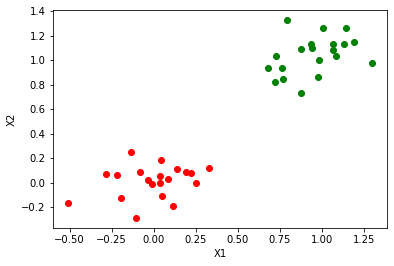

In [22]:
fig, axes = plt.subplots()
axes.scatter(data_svm_test[data_svm_test['Color'] == 0]['X1'],
          data_svm_test[data_svm_test['Color'] == 0]['X2'],
          c='g')
axes.scatter(data_svm_test[data_svm_test['Color'] == 1]['X1'],
          data_svm_test[data_svm_test['Color'] == 1]['X2'],
          c='r')
axes.set_ylabel('X2')
axes.set_xlabel('X1')
plt.show()

In [103]:
from sklearn.svm import SVC


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def get_info(axes, model, x, y, name, only_plot=False):
    predicted = model.predict(x)
    if not only_plot:
        print(name)
        print('Кол-во опорных векторов: ', model.support_vectors_.shape)
        print('Точность: ', accuracy_score(y, predicted))
        print('Матрица ошибок: ')
        print(confusion_matrix(y, predicted))

    X1, X2 = x.iloc[:, 0], x.iloc[:, 1]
    xx, yy = make_meshgrid(X1, X2)
    
    plot_contours(axes, model, xx, yy, cmap=plt.cm.RdPu, alpha=0.2)
    axes.scatter(X1, X2, c=y, cmap=plt.cm.RdPu, edgecolors='k')
    axes.set_title(name + f' (точность: {accuracy_score(y, predicted)})')
    axes.set_xlim(xx.min(), xx.max())
    axes.set_ylim(yy.min(), yy.max())

На тестовой выборке
Кол-во опорных векторов:  (6, 2)
Точность:  1.0
Матрица ошибок: 
[[20  0]
 [ 0 20]]
На обучающей выборке
Кол-во опорных векторов:  (6, 2)
Точность:  1.0
Матрица ошибок: 
[[20  0]
 [ 0 20]]


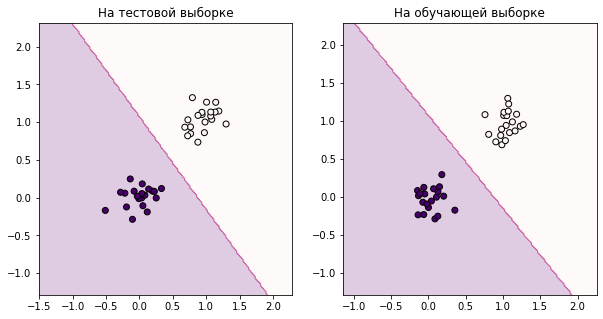

In [37]:
x_train = data_svm[['X1', 'X2']]
y_train = data_svm['Color'] 
x_test = data_svm_test[['X1', 'X2']] 
y_test = data_svm_test['Color']

model = SVC(kernel='linear')
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(10, 5))
get_info(axes1, model, x_test, y_test, 'На тестовой выборке')

# на обучающей выборке
get_info(axes2, model, x_train, y_train, 'На обучающей выборке')
plt.show()

### Пункт 2

In [39]:
data_svm_b = pd.read_csv('lab1_files/svmdata_b.txt', sep='\t')
data_svm_b.Colors = data_svm_b.Colors.map({'red': 1, 'green': 0})
data_svm_b_test = pd.read_csv('lab1_files/svmdata_b_test.txt', sep='\t')
data_svm_b_test.Colors = data_svm_b_test.Colors.map({'red': 1, 'green': 0})

На тестовой выборке
Кол-во опорных векторов:  (3, 2)
Точность:  1.0
Матрица ошибок: 
[[25  0]
 [ 0 25]]
На обучающей выборке
Кол-во опорных векторов:  (3, 2)
Точность:  0.98
Матрица ошибок: 
[[25  0]
 [ 1 24]]


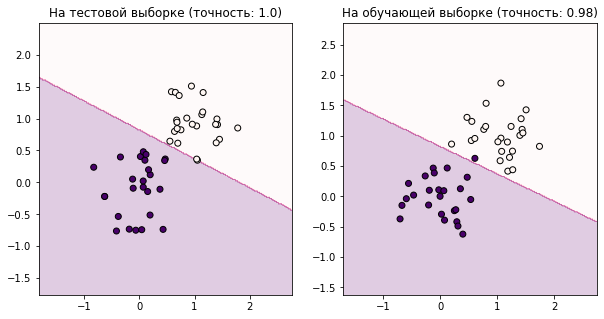

In [108]:
x_train = data_svm_b[['X1', 'X2']]
y_train = data_svm_b['Colors'] 
x_test = data_svm_b_test[['X1', 'X2']] 
y_test = data_svm_b_test['Colors']

model = SVC(kernel='linear', C=189.5)
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(10, 5))
get_info(axes1, model, x_test, y_test, 'На тестовой выборке')

# на обучающей выборке
get_info(axes2, model, x_train, y_train, 'На обучающей выборке')
plt.show()

### Пункт 3

In [88]:
data_svm_c = pd.read_csv('lab1_files/svmdata_c.txt', sep='\t')
data_svm_c.Colors = data_svm_c.Colors.map({'red': 1, 'green': 0})
data_svm_c_test = pd.read_csv('lab1_files/svmdata_c_test.txt', sep='\t')
data_svm_c_test.Colors = data_svm_c_test.Colors.map({'red': 1, 'green': 0})

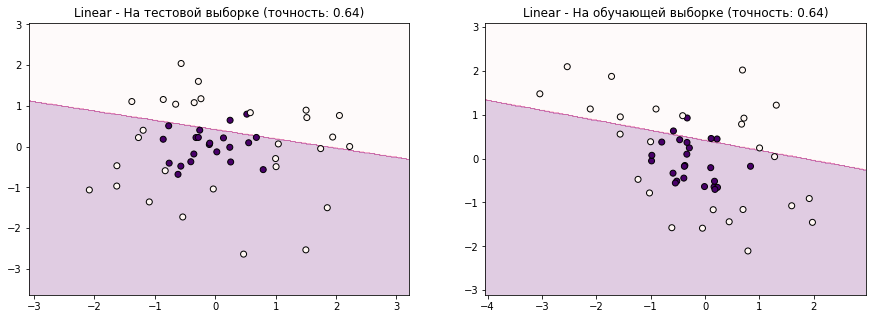

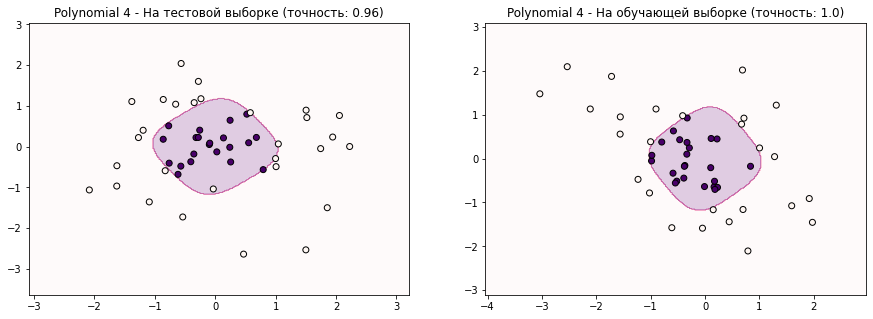

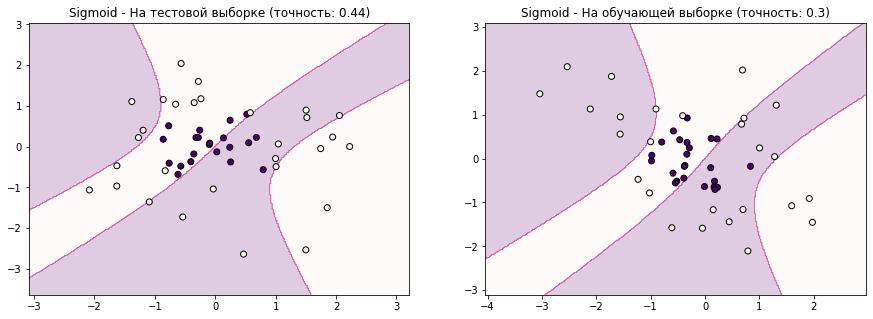

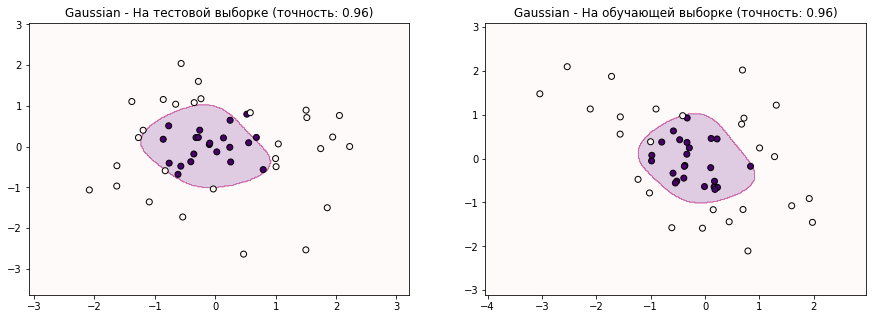

In [136]:
x_train = data_svm_c[['X1', 'X2']]
y_train = data_svm_c['Colors'] 
x_test = data_svm_c_test[['X1', 'X2']] 
y_test = data_svm_c_test['Colors']


model = SVC(kernel='linear', C=50)
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15, 5))
get_info(axes1, model, x_test, y_test, 'Linear - На тестовой выборке', True)

# на обучающей выборке
get_info(axes2, model, x_train, y_train, 'Linear - На обучающей выборке', True)
plt.show()


model = SVC(kernel='poly', degree=4, gamma=2)
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15, 5))
get_info(axes1, model, x_test, y_test, f'Polynomial {4} - На тестовой выборке', True)
# на обучающей выборке
get_info(axes2, model, x_train, y_train, f'Polynomial {4} - На обучающей выборке', True)


model = SVC(kernel='sigmoid')
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15, 5))
get_info(axes1, model, x_test, y_test, f'Sigmoid - На тестовой выборке', True)
# на обучающей выборке
get_info(axes2, model, x_train, y_train, f'Sigmoid - На обучающей выборке', True)


model = SVC(kernel='rbf', gamma=1.5)
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15, 5))
get_info(axes1, model, x_test, y_test, f'Gaussian - На тестовой выборке', True)
# на обучающей выборке
get_info(axes2, model, x_train, y_train, f'Gaussian - На обучающей выборке', True)


plt.show()

Для набора данных лучше всего подходят следующие ядра:
1. Полиномиальное 4 степени
2. Радиальная базисная функция Гаусса

### Пункт 4

In [137]:
data_svm_d = pd.read_csv('lab1_files/svmdata_d.txt', sep='\t')
data_svm_d.Colors = data_svm_d.Colors.map({'red': 1, 'green': 0})
data_svm_d_test = pd.read_csv('lab1_files/svmdata_d_test.txt', sep='\t')
data_svm_d_test.Colors = data_svm_d_test.Colors.map({'red': 1, 'green': 0})


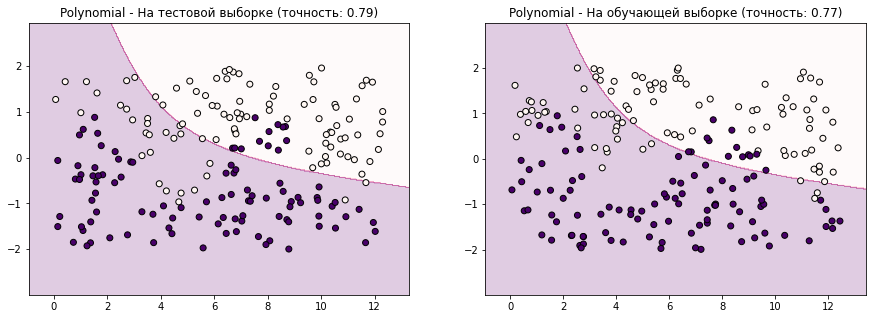

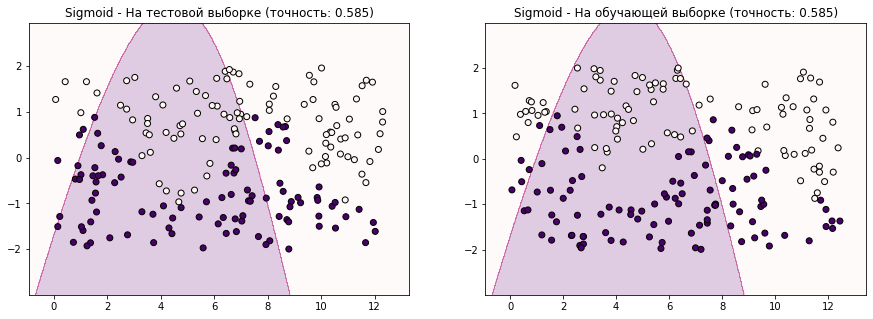

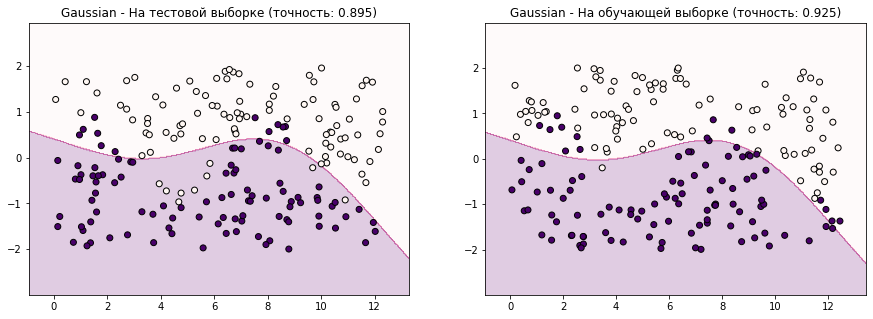

In [198]:
x_train = data_svm_d[['X1', 'X2']]
y_train = data_svm_d['Colors'] 
x_test = data_svm_d_test[['X1', 'X2']] 
y_test = data_svm_d_test['Colors']


model = SVC(kernel='poly')
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15, 5))
get_info(axes1, model, x_test, y_test, f'Polynomial - На тестовой выборке', True)
# на обучающей выборке
get_info(axes2, model, x_train, y_train, f'Polynomial - На обучающей выборке', True)


model = SVC(kernel='sigmoid')
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15, 5))
get_info(axes1, model, x_test, y_test, f'Sigmoid - На тестовой выборке', True)
# на обучающей выборке
get_info(axes2, model, x_train, y_train, f'Sigmoid - На обучающей выборке', True)


model = SVC(kernel='rbf')
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15, 5))
get_info(axes1, model, x_test, y_test, f'Gaussian - На тестовой выборке', True)
# на обучающей выборке
get_info(axes2, model, x_train, y_train, f'Gaussian - На обучающей выборке', True)


plt.show()

Для набора данных лучше всего подходит Радиальная базисная функция Гаусса.

### Пункт 5

In [160]:
data_svm_e = pd.read_csv('lab1_files/svmdata_e.txt', sep='\t')
data_svm_e.Colors = data_svm_e.Colors.map({'red': 1, 'green': 0})
data_svm_e_test = pd.read_csv('lab1_files/svmdata_e_test.txt', sep='\t')
data_svm_e_test.Colors = data_svm_e_test.Colors.map({'red': 1, 'green': 0})

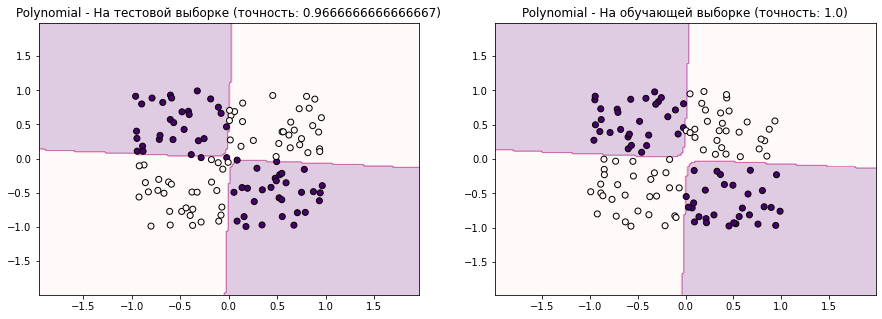

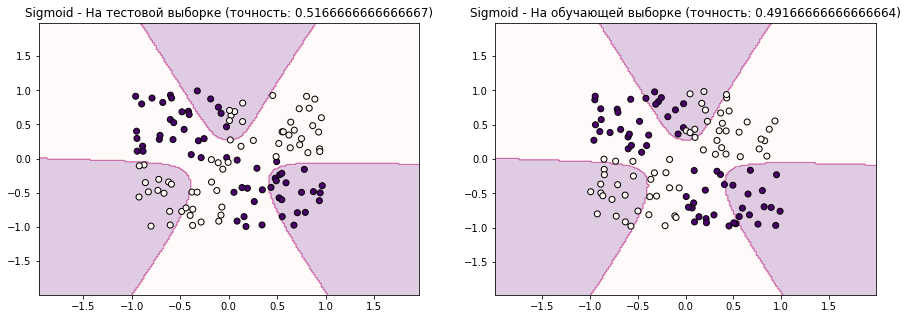

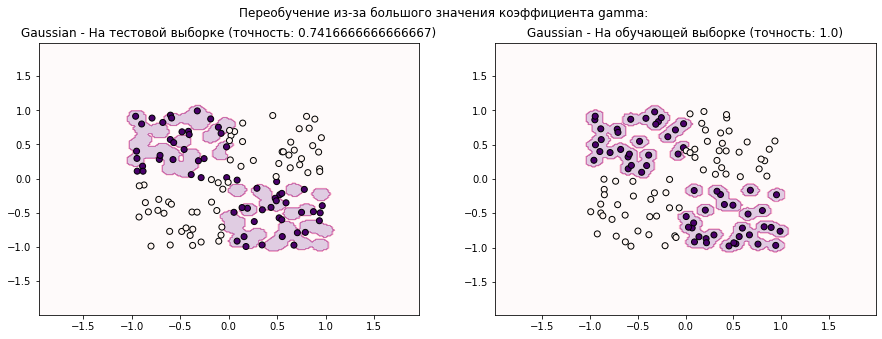

In [207]:
x_train = data_svm_e[['X1', 'X2']]
y_train = data_svm_e['Colors'] 
x_test = data_svm_e_test[['X1', 'X2']] 
y_test = data_svm_e_test['Colors']


model = SVC(kernel='poly', C=70, degree=2)
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15, 5))
get_info(axes1, model, x_test, y_test, f'Polynomial - На тестовой выборке', True)
# на обучающей выборке
get_info(axes2, model, x_train, y_train, f'Polynomial - На обучающей выборке', True)


model = SVC(kernel='sigmoid')
model.fit(x_train, y_train)

# на тестовой выборке
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15, 5))
get_info(axes1, model, x_test, y_test, f'Sigmoid - На тестовой выборке', True)
# на обучающей выборке
get_info(axes2, model, x_train, y_train, f'Sigmoid - На обучающей выборке', True)


model = SVC(kernel='rbf',C=50, gamma=500)
model.fit(x_train, y_train)

fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Переобучение из-за большого значения коэффициента gamma:')

# на тестовой выборке
get_info(axes1, model, x_test, y_test, f'Gaussian - На тестовой выборке', True)

# на обучающей выборке
get_info(axes2, model, x_train, y_train, f'Gaussian - На обучающей выборке', True)

plt.show()

Для набора данных лучше всего подходят следующие ядра:
1. Полиномиальное 2 степени
2. Радиальная базисная функция Гаусса

# Задание 5

Постройте классификаторы для различных данных на основе деревьев решений:
1. Загрузите набор данных Glass из файла glass.csv. Постройте дерево классификации для модели, предсказывающей тип (Type) по остальным признакам. Визуализируйте результирующее дерево решения. Дайте интерпретацию полученным результатам. Является ли построенное дерево избыточным? Исследуйте зависимость точности классификации от критерия расщепления, максимальной глубины дерева и других параметров по вашему усмотрению.
2. Загрузите набор данных spam7 из файла spam7.csv. Постройте оптимальное, по вашему мнению, дерево классификации для параметра yesno. Объясните, как был осуществлён подбор параметров. Визуализируйте результирующее дерево решения. Определите наиболее влияющие признаки. Оцените качество классификации.

### Пункт 1

In [3]:
from sklearn import tree

In [4]:
data_glass = pd.read_csv('lab1_files/glass.csv')
data_glass.drop('Id', axis=1, inplace=True)
data_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    data_glass.drop(['Type'], axis=1), 
    data_glass['Type'], 
    test_size=0.3,
    random_state=44)

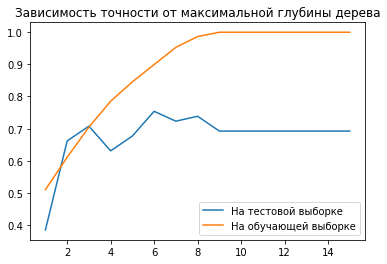

In [26]:
accuracy_test = []
accuracy_train = []
max_depth_list = [i for i in range(1,16)]
min_samples_split_list = [i for i in range(2,16)]
for max_depth in max_depth_list:
    model = tree.DecisionTreeClassifier(random_state=1, max_depth=max_depth)

    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, predicted))
    
    predicted = model.predict(x_train)
    accuracy_train.append(accuracy_score(y_train, predicted))

plt.title('Зависимость точности от максимальной глубины дерева')
plt.plot(max_depth_list, accuracy_test, label='На тестовой выборке')
plt.plot(max_depth_list, accuracy_train, label='На обучающей выборке')
plt.legend()
plt.show()

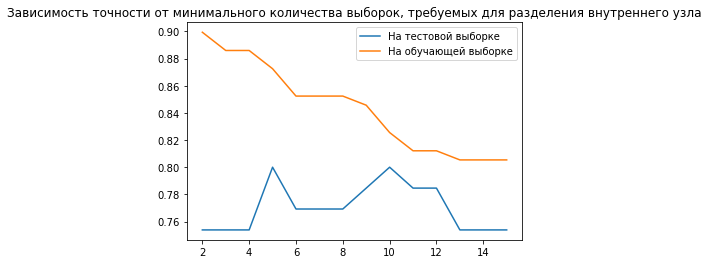

In [27]:
accuracy_test = []
accuracy_train = []

for min_samples_split in min_samples_split_list:
    model = tree.DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_split=min_samples_split)

    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, predicted))
    
    predicted = model.predict(x_train)
    accuracy_train.append(accuracy_score(y_train, predicted))

plt.title('Зависимость точности от минимального количества выборок, требуемых для разделения внутреннего узла')
plt.plot(min_samples_split_list, accuracy_test, label='На тестовой выборке')
plt.plot(min_samples_split_list, accuracy_train, label='На обучающей выборке')
plt.legend()
plt.show()

Точность:  0.8


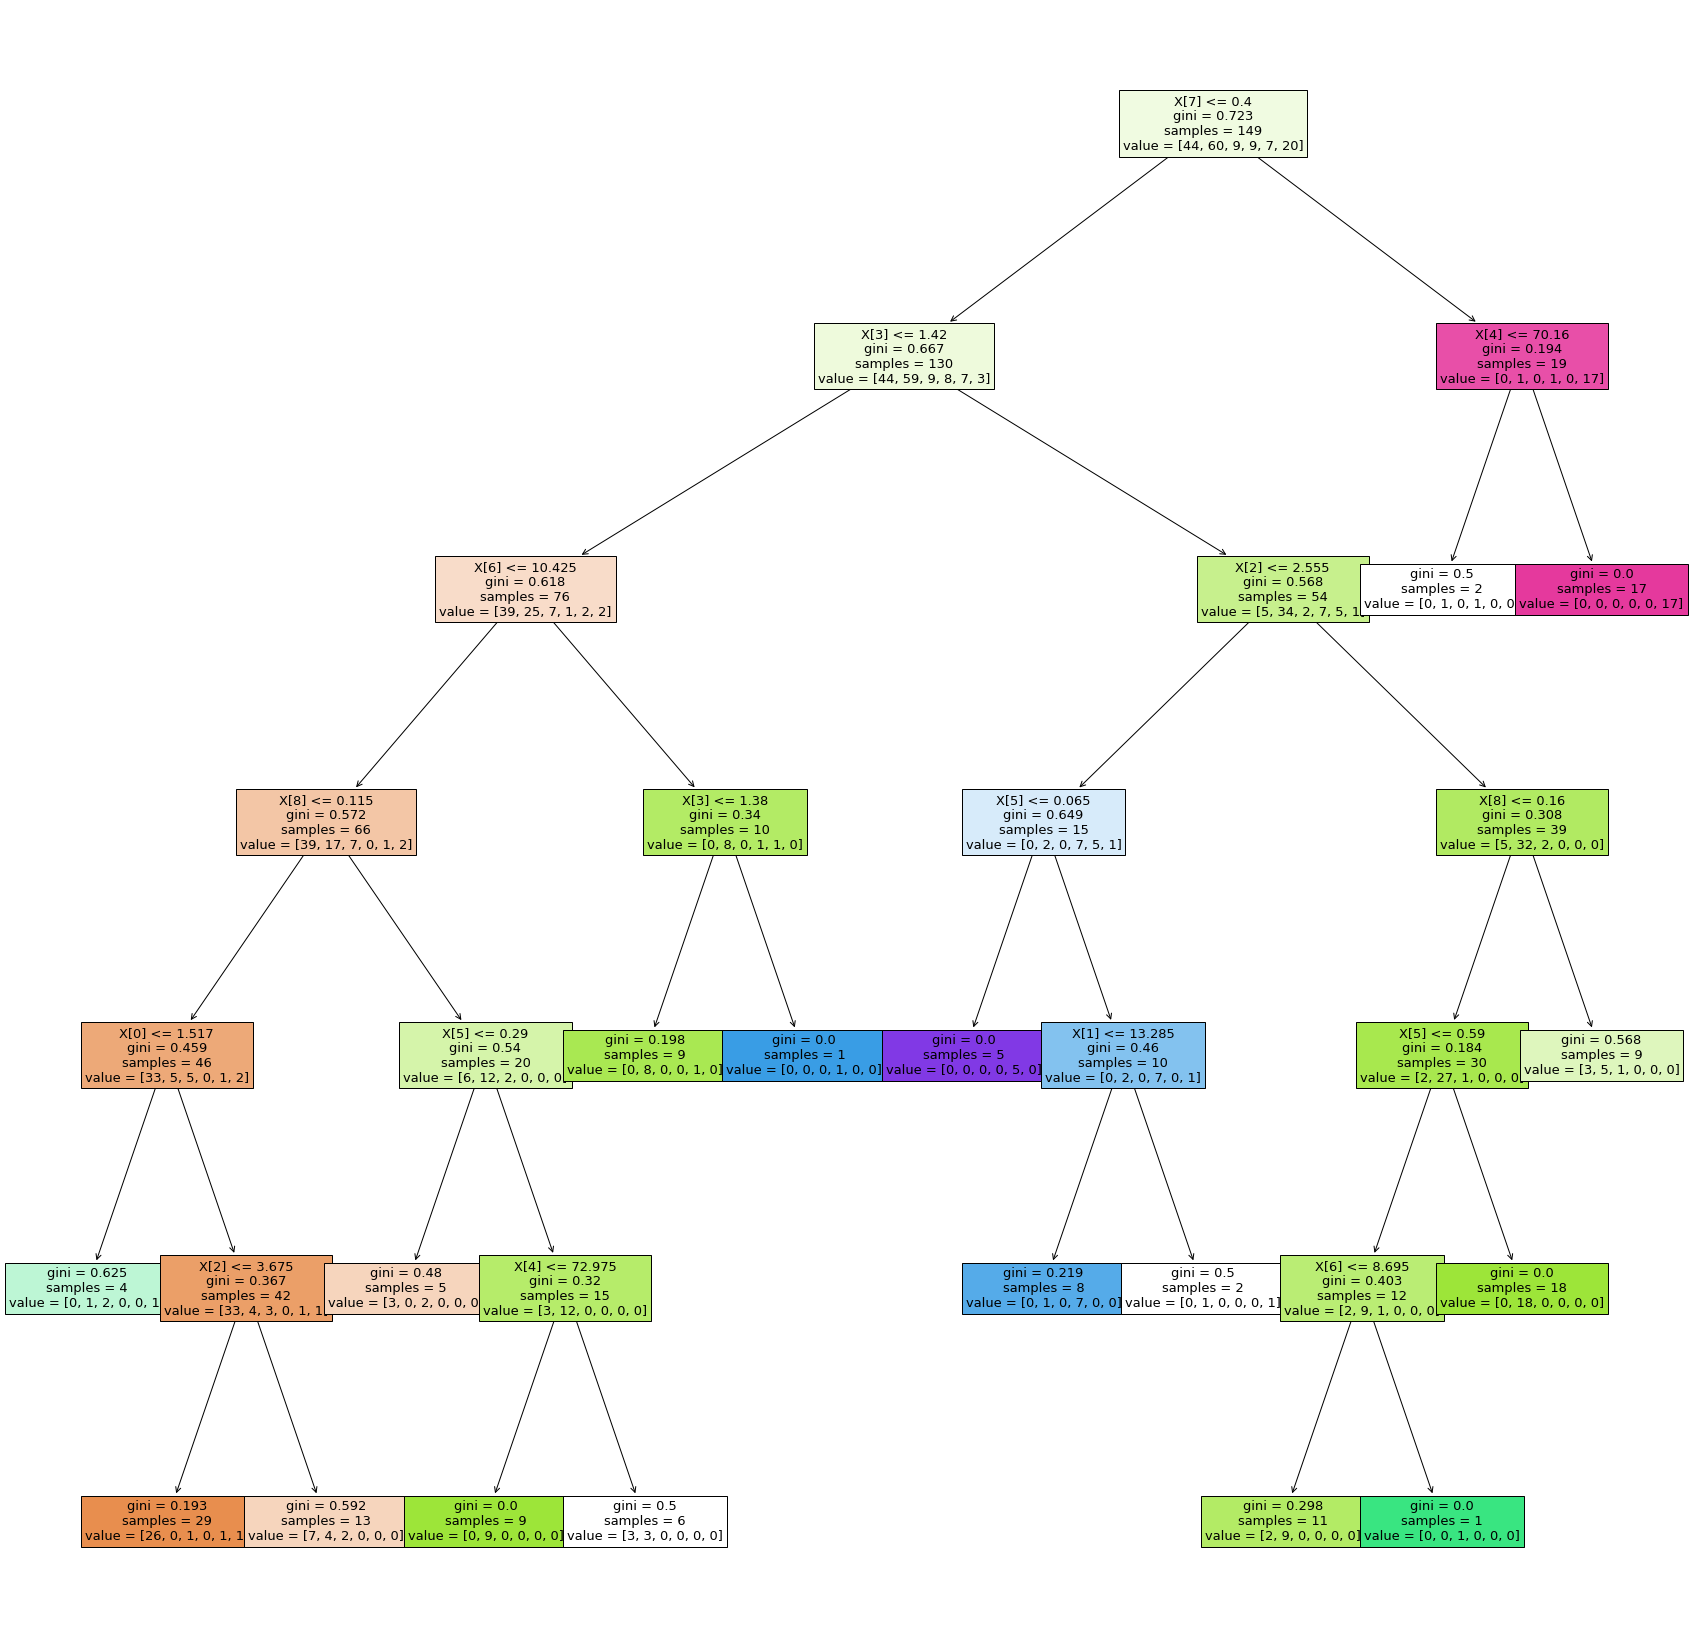

In [28]:
model = tree.DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_split=10)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print('Точность: ', accuracy_score(y_test, predicted))

fig, axes = plt.subplots(figsize=(30, 30))
tree.plot_tree(model, filled=True, fontsize=13)
plt.show()

### Пункт 2

In [33]:
data_spam = pd.read_csv('lab1_files/spam7.csv')
data_spam.yesno = data_spam.yesno.map({'y': 1, 'n': 0})
data_spam

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0
4597,14,0.000,0.353,0.00,0.00,0.00,0
4598,118,0.000,0.000,0.00,0.00,0.30,0
4599,78,0.000,0.000,0.00,0.00,0.96,0


In [59]:
x_train, x_test, y_train, y_test = train_test_split(
    data_spam.drop(['yesno'], axis=1), 
    data_spam['yesno'], 
    test_size=0.5,
    random_state=44)

Точность:  0.8770099956540635


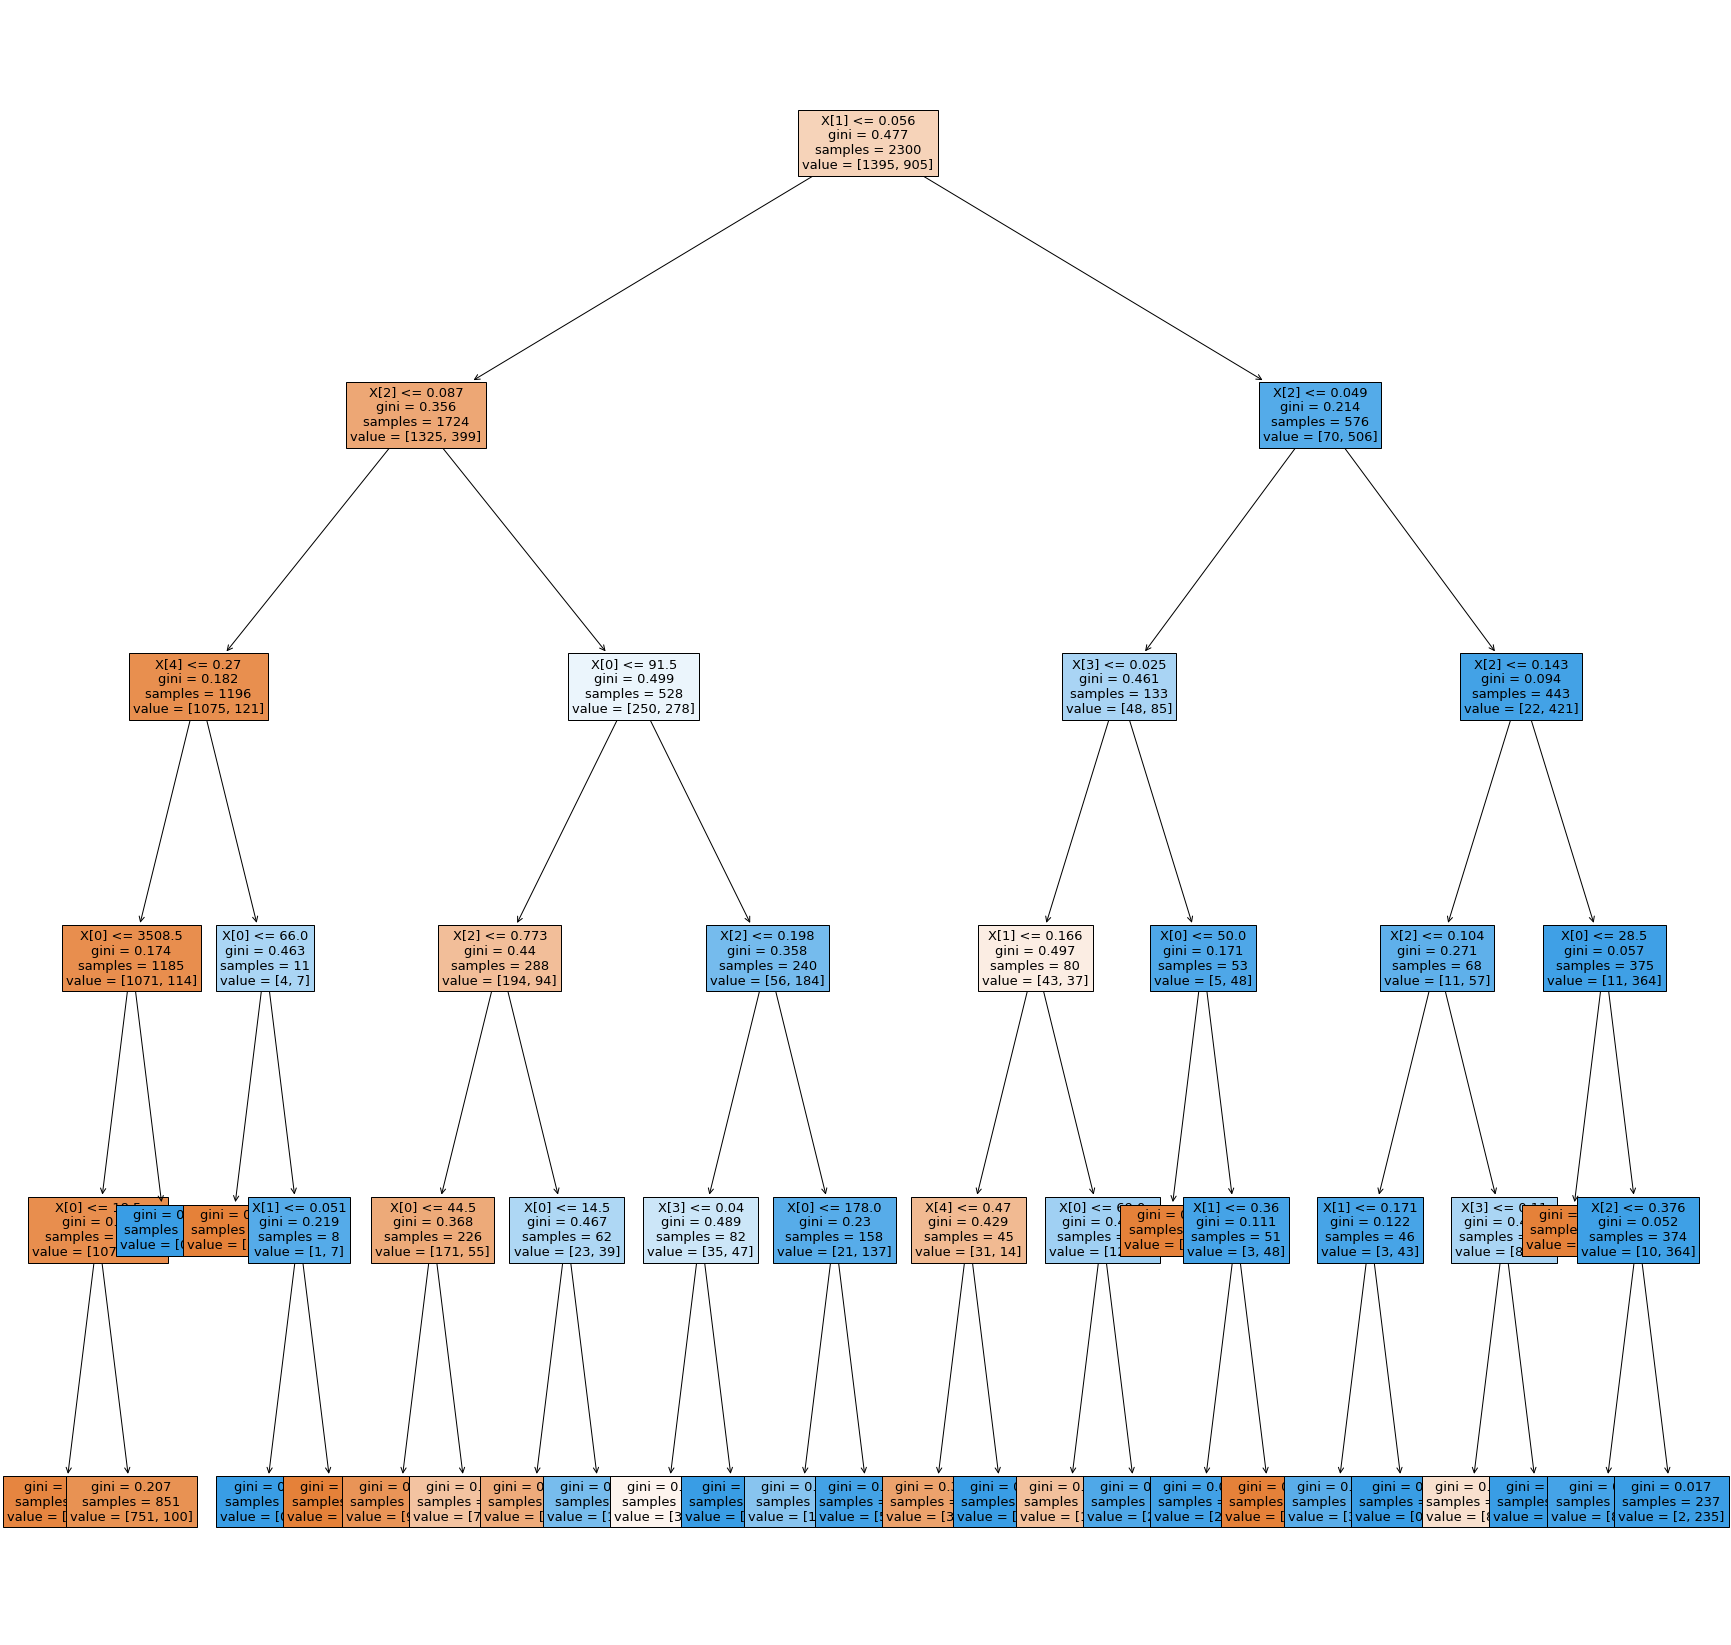

In [60]:
model = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print('Точность: ', accuracy_score(y_test, predicted))

fig, axes = plt.subplots(figsize=(30, 30))
tree.plot_tree(model, filled=True, fontsize=13)
plt.show()